In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
x_train = np.memmap('drive/My Drive/Xtrain.dat', shape=(600000, 2351), dtype=np.float32)
y_train = np.memmap('drive/My Drive/Ytrain.dat', dtype=np.float32)
# 0 for benign (nb of elm => 300000)
# 1 for malicious (nb of elm => 300000)

In [0]:
# normalize the data
std_scaler = preprocessing.StandardScaler()
x_train = std_scaler.fit_transform(x_train)

In [5]:
# split the data into two parts (training set and test set)
x_train, x_test = x_train[:550000], x_train[550000:]
y_train, y_test = y_train[:550000], y_train[550000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550000, 2351)
(550000,)
(50000, 2351)
(50000,)


In [6]:
print(x_train[0].shape)

(2351,)


In [0]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import optimizers, regularizers

In [0]:
# create our autoencoder

# input vector
input_vect = Input(shape=(2351,))

# encode our data
encoder = Dense(1024, activation='relu', activity_regularizer=regularizers.l1(0.001)) (input_vect)
encoder = Dense(512, activation='relu') (encoder)

# decode our data
decoder = Dense(1024, activation='relu') (encoder)

# output
decoder = Dense(2351, activation='sigmoid') (decoder)

# The model
autoencoder = Model(input_vect, decoder)

In [23]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2351)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2408448   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_14 (Dense)             (None, 2351)              2409775   
Total params: 5,868,335
Trainable params: 5,868,335
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile our model
# use MSE => working better than crossentropy
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
# fit our model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
550000/550000 [==============================] - 20s 37us/step - loss: 7.4761
Epoch 2/10
550000/550000 [==============================] - 20s 36us/step - loss: 2.2530
Epoch 3/10
550000/550000 [==============================] - 19s 35us/step - loss: 1.7204
Epoch 4/10
550000/550000 [==============================] - 19s 35us/step - loss: 1.5023
Epoch 5/10
550000/550000 [==============================] - 19s 35us/step - loss: 1.3667
Epoch 6/10
550000/550000 [==============================] - 20s 35us/step - loss: 1.2959
Epoch 7/10
550000/550000 [==============================] - 20s 36us/step - loss: 1.2216
Epoch 8/10
550000/550000 [==============================] - 20s 36us/step - loss: 1.1903
Epoch 9/10
550000/550000 [==============================] - 19s 35us/step - loss: 1.1792
Epoch 10/10
550000/550000 [==============================] - 19s 35us/step - loss: 1.1662


In [0]:
# add one layer for classification
output = Dense(1, activation='sigmoid') (decoder)
model = Model(input_vect, output)

In [0]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# fit the model
history = model.fit(x_train, y_train, validation_split=0.25, epochs=2, batch_size=32, shuffle=True)

Train on 412500 samples, validate on 137500 samples
Epoch 1/2
412500/412500 [==============================] - 89s 216us/step - loss: 1.7437 - acc: 0.9276 - val_loss: 2.2659 - val_acc: 0.9193
Epoch 2/2
412500/412500 [==============================] - 88s 213us/step - loss: 1.1936 - acc: 0.9474 - val_loss: 2.2183 - val_acc: 0.9449


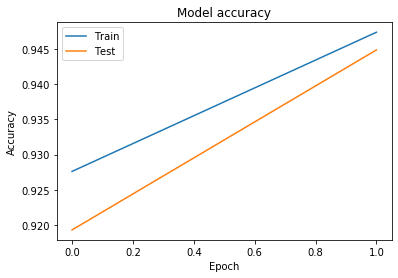

In [29]:
# evaluate our model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("loss: " + str(loss))
print("acc: " + str(acc))

loss: 1.175764148607254
acc: 0.95874
